###**학습목표**###

1. 데이터셋을 만들고 데이터 사이즈를 변경할 수 있다.
2. 가위바위보를 인식하는 딥러닝 네트워크를 설계할 수 있다.
3. 딥러닝 네트워크를 학습시키고, 테스트용 데이터로 정확도를 확인할 수 있다.
4. 높은 정확도를 가지는 더 좋은 네트워크를 만들 수 있다.


###**목차**###
- 데이터셋 구축
- 데이터셋 로딩
- 모델 학습


###**라벨링**###

    # 가위 : 0, 바위 : 1, 보 : 2


###**데이터셋 구축**

https://teachablemachine.withgoogle.com/

In [ ]:
# 라이브러리
from PIL import Image
import os,glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print("라이브러리 import 완료!")

라이브러리 import 완료!


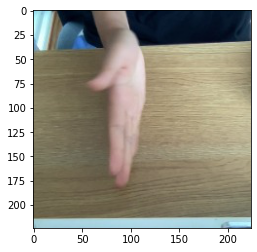

In [ ]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/3_data"+"/paper/"
# 이미지 열기
image_pil = Image.open(image_dir_path + "1.jpg")
image = np.array(image_pil)

plt.imshow(image)
plt.show()

In [ ]:
# 이미지 크기 확인
image.shape

(224, 224, 3)

###**데이터셋 로딩

**28*28사이즈로 변경

In [ ]:
def resize_images(img_path):
  images = glob.glob(img_path + "/*.jpg")

  print(len(images), " images to be resized.")

  # 파일마다 모두 28*28 사이즈로 저장
  target_size = (28,28)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")

  print(len(images), " images resized.")


# 가위 변경
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/3_data/scissor"
resize_images(image_dir_path)

# 바위 변경
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/3_data/rock"
resize_images(image_dir_path)

# 보 변경
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/3_data/paper"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
# 라벨링

def load_data(img_path, number_of_data = 300):
      # 가위 : 0, 바위 : 1, 보 : 2
      img_size = 28
      color = 3
      #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
      imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,img_size,color)
      labels = np.zeros(number_of_data, dtype=np.int32)

      idx = 0

      # 가위
      for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        labels[idx]=0
        idx += 1

      # 바위
      for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        labels[idx]=1
        idx += 1
      
      # 보
      for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        labels[idx]=0
        idx += 1

      print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
      return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/2022/BOAZ/아이펠/3_data/"
(x_train, y_train) = load_data(image_dir_path)
# 정규화
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


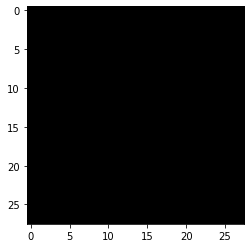

In [ ]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

###**모델 학습**

In [ ]:
# 딥러닝 네트워크 설계

import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation= 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

###**딥러닝 네트워크 학습시키기**

In [ ]:
epochs = 20
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = epochs)

Epoch 1/20
10/10 [==============================] - 1s 20ms/step - loss: 1.0961 - accuracy: 0.6667
Epoch 2/20
10/10 [==============================] - 0s 19ms/step - loss: 1.0895 - accuracy: 0.6667
Epoch 3/20
10/10 [==============================] - 0s 19ms/step - loss: 1.0832 - accuracy: 0.6667
Epoch 4/20
10/10 [==============================] - 0s 17ms/step - loss: 1.0768 - accuracy: 0.6667
Epoch 5/20
10/10 [==============================] - 0s 19ms/step - loss: 1.0705 - accuracy: 0.6667
Epoch 6/20
10/10 [==============================] - 0s 18ms/step - loss: 1.0645 - accuracy: 0.6667
Epoch 7/20
10/10 [==============================] - 0s 18ms/step - loss: 1.0583 - accuracy: 0.6667
Epoch 8/20
10/10 [==============================] - 0s 20ms/step - loss: 1.0525 - accuracy: 0.6667
Epoch 9/20
10/10 [==============================] - 0s 17ms/step - loss: 1.0464 - accuracy: 0.6667
Epoch 10/20
10/10 [==============================] - 0s 19ms/step - loss: 1.0406 - accuracy: 0.6667
Epoch 11/

###**얼마나 잘 만들었는지 확인하기(테스트)**
테스트 데이터를 사용해야함! 따로 구축 필요


In [ ]:
# `load_test()` 함수를 정의해는 코드를 직접 작성해 보세요.
# Hint! `load_data`를 참고하세요.

def load_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

print("슝~")


슝~


In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# resize_images 에서 다소 시간이 걸릴 수 있습니다

# 테스트 데이터 경로 설정 
test_dir_path =    

resize_images(os.path.join(test_dir_path, "rock"))
resize_images(os.path.join(test_dir_path, "scissor"))
resize_images(os.path.join(test_dir_path, "paper"))

(x_test, y_test)=load_test(test_dir_path)  # 테스트 데이터 불러오기 
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


In [ ]:
# model을 학습시키는 코드

model.evaluate(x_test_norm, y_test)